In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

### [다음 사이트](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)에서 Mall_Customer.csv 데이터를 다운 받아주세요!

#### 1.1 데이터를 로드하고 확인해주세요.

In [2]:
import os

os.chdir("/temp")

df = pd.read_csv("Mall_Customers.csv")

#### 1.2 'CustomerID'는 군집 분석에 필요없는 변수이므로 삭제하겠습니다. 삭제한 후 데이터셋의 행, 열 수를 확인해주세요.

In [3]:
df = df.drop("CustomerID", axis = 1)


#### 1.3 데이터셋 변수들의 정보를 확인해주세요.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


#### 1.4 'Gender' 변수의 자료형이 object이므로 전처리가 필요할 것 같습니다. get_dummies를 이용해 원핫인코딩 진행 후 데이터셋을 확인해주세요.

In [5]:
df = pd.get_dummies(df, columns=["Gender"])


#### 1.5 데이터를 5개의 그룹으로 군집화해보겠습니다. n_cluster = 5, 초기 중심 설정 방식 : k-means++, 최대 반복 횟수 : 300으로 설정하여 KMeans 객체를 만든 후 fit( )을 수행해주세요.

In [6]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(df)

KMeans(n_clusters=5, random_state=0)

#### 1.6 kmeans의 labels_ 속성값을 확인해보겠습니다.

In [7]:
df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0
...,...,...,...,...,...
195,35,120,79,1,0
196,45,126,28,1,0
197,32,126,74,0,1
198,32,137,18,0,1


In [8]:
print(kmeans.labels_)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 3 2 1 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 1 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


#### 1.7 target 값은 데이터의 spending score로, cluster 칼럼은 앞에서 구한 labels_ 값으로 지정하여 target과 cluster 값 개수를 비교하세요.

In [9]:
df['target'] = df['Spending Score (1-100)']
df['cluster'] = kmeans.labels_
df_result = df.groupby(['target', 'cluster']).count()
print(df_result)

                Age  Annual Income (k$)  Spending Score (1-100)  \
target cluster                                                    
1      3          2                   2                       2   
3      0          1                   1                       1   
4      0          2                   2                       2   
5      0          1                   1                       1   
       3          3                   3                       3   
...             ...                 ...                     ...   
94     4          1                   1                       1   
95     2          2                   2                       2   
97     2          2                   2                       2   
98     4          1                   1                       1   
99     4          1                   1                       1   

                Gender_Female  Gender_Male  
target cluster                              
1      3                    2         

#### 1.8 PCA를 이용해 4개의 속성을 2개로 차원 축소한 뒤 X좌표, Y좌표로 개별 데이터를 표현하도록 하겠습니다.

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(df)

df['pca_x'] = pca_transformed[:,0]
df['pca_y'] = pca_transformed[:,1]


#### 1.9 군집별 산점도를 출력합니다.

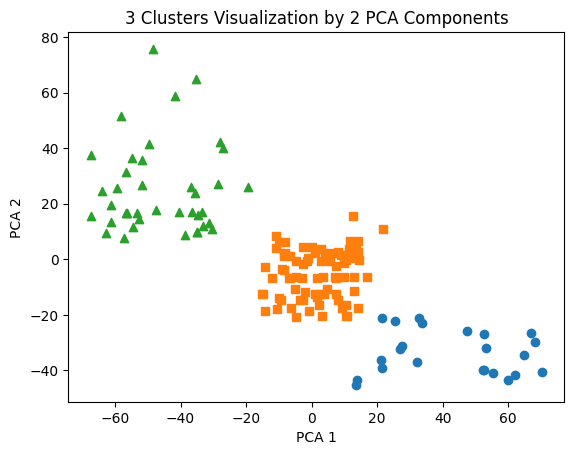

In [11]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = df[df['cluster']==0].index
marker1_ind = df[df['cluster']==1].index
marker2_ind = df[df['cluster']==2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 마커 표시
plt.scatter(x=df.loc[marker0_ind,'pca_x'], y=df.loc[marker0_ind,'pca_y'], marker='o')
plt.scatter(x=df.loc[marker1_ind,'pca_x'], y=df.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=df.loc[marker2_ind,'pca_x'], y=df.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

#### 1.10 데이터를 이용한 군집 평가

In [12]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

#### 1.11 1.5와 1.7의 코드를 바탕으로 데이터셋의 모든 개별 데이터에 실루엣 계수 값을 구해주세요.

In [13]:
score_samples = silhouette_samples(df, df['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

silhouette_samples( ) return 값의 shape (200,)


#### 1.12 데이터셋 데이터프레임에 실루엣 계수 칼럼을 추가해주세요.

In [14]:

df['silhouette_coeff'] = score_samples

#### 1.13 모든 데이터의 평균 실루엣 계수값을 구하고 확인해주세요.

In [15]:
average_score = silhouette_score(df, df['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

df.head(3)

붓꽃 데이터셋 Silhouette Analysis Score:0.500


,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,target,cluster,pca_x,pca_y,silhouette_coeff
0,19,15,39,0,1,39,0,13.558957,-45.237654,0.179891
1,21,15,81,0,1,81,4,-44.975512,-46.152012,0.691104
2,20,16,6,1,0,6,0,59.872120,-43.500395,0.534020


#### 1.14 데이터셋의 군집 칼럼별로 groupby하여 실루엣 계수 칼럼의 평균값을 구해주세요.

In [16]:
df.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.425569
1    0.510878
2    0.530877
3    0.457424
4    0.554107
Name: silhouette_coeff, dtype: float64

#### 1.15 Inertia와 Elbow를 구하는 코드입니다. 참고해주세요.

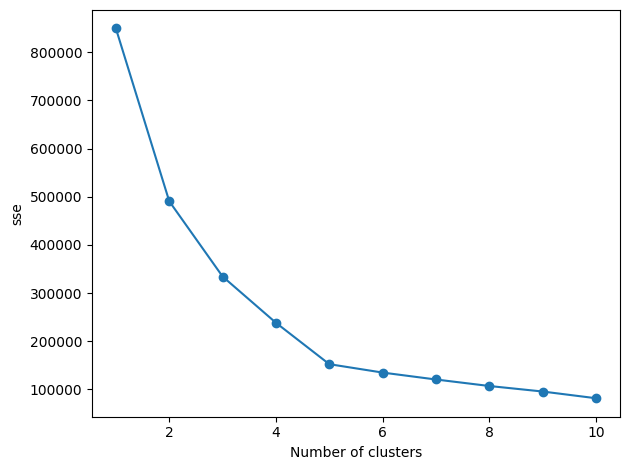

In [17]:
# 중심점 - 데이터 거리를 합산한 inertia(sse)를 빈 array로 생성
sse = []

# 반복문을 실행하며 군집의 개수가 1~11까지 kmeans를 실행 --> sse array에 추가
for i in range(1, 11) :
    km = KMeans(n_clusters = i,
               init = 'k-means++',
               n_init = 10,
               max_iter = 300,
               random_state = 0)
    km.fit(df)
    sse.append(km.inertia_)

# sse array 시각화   
plt.plot(range(1,11), sse, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('sse')
plt.tight_layout()
plt.show()

#### 2.1 데이터는 1의 데이터를 계속 활용합니다. 'Annual income'에 대한 'Spending Score'을 scatter plot으로 나타내주세요.

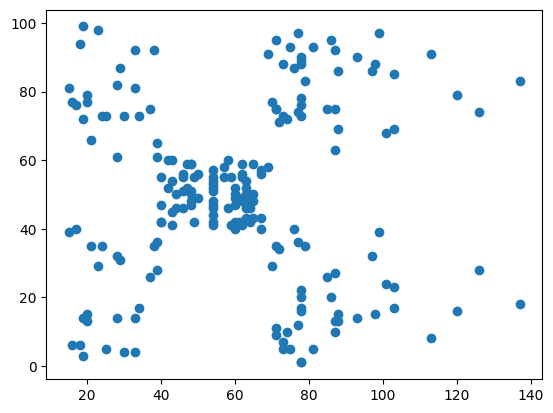

In [18]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.show()

#### 2.2 StandardScaler를 통해 정규화를 진행해주세요.

In [19]:
from sklearn.preprocessing import StandardScaler
df_std = StandardScaler().fit_transform(df)

#### 2.3 최적 대역폭을 구하여 평균 이동 군집화를 진행해주세요. 최적 bandwidth와 cluster label 유형을 출력해주세요. (인자 : df_std)

In [20]:
from sklearn.cluster import estimate_bandwidth
from sklearn.cluster import MeanShift

bandwidth = estimate_bandwidth(df_std)

meanshift= MeanShift(bandwidth=bandwidth)
cluster_labels = meanshift.fit_predict(df_std)

print('bandwidth 값:', round(bandwidth,3))
print('cluster labels 유형:',np.unique(cluster_labels))

bandwidth 값: 3.643
cluster labels 유형: [0]


#### 2.4 target 변수를 'Spending Score'로 설정하여 결과를 확인하려고 합니다. 다음 코드의 빈칸을 채워주세요.

In [21]:
df['target'] = df['Spending Score (1-100)']
df['cluster']= cluster_labels
result = df.groupby(['target','cluster'])['Annual Income (k$)'].count()
print(result)



target  cluster
1       0          2
3       0          1
4       0          2
5       0          4
6       0          2
                  ..
94      0          1
95      0          2
97      0          2
98      0          1
99      0          1
Name: Annual Income (k$), Length: 84, dtype: int64


#### 2.5 2차원으로 축소하여 시각화를 진행하려고 합니다. 다음 코드의 빈칸을 채워주세요.

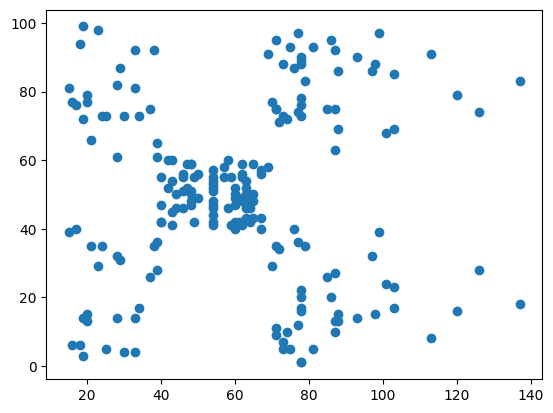

In [22]:
m0_ind = df[df['cluster']==0].index
m1_ind = df[df['cluster']==1].index

plt.scatter(x=df.loc[m0_ind,'Annual Income (k$)'], y=df.loc[m0_ind,'Spending Score (1-100)'],marker='o')
plt.scatter(x=df.loc[m1_ind,'Annual Income (k$)'], y=df.loc[m1_ind,'Spending Score (1-100)'],marker='s')

plt.show()

#### 2.6 사이킷런 AgglomerativeClustering 클래스를 통해 병합군집을 진행해주세요. 클러스터 개수는 3으로, 병합 방식은 'ward'로 설정해주세요. cluster labels 유형을 출력해주세요.  (인자 : df)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
agg =

#### 2.7 덴드로그램을 그려주세요.

In [ ]:
from scipy.cluster.hierarchy import dendrogram, ward

#### 2.8 다시 데이터를 로드하고 다음 코드를 실행해주세요.

In [ ]:
#데이터 다시 로드

#### 2.9 AIC, BIC를 구하여 n_components 값을 결정하려고 합니다. 다음 코드의 빈칸을 채워주세요.

In [ ]:
# AIC, BIC
from sklearn.mixture import <             >

gmm_per_k = [GaussianMixture(<           >, n_init=10, random_state=0).fit(df) for k in range(1,11)]

bics = [<       >(df) for model in gmm_per_k]  # model 별 bic 구하기
aics = [<       >(df) for model in gmm_per_k]  # model 별 aic 구하기

plt.plot(range(1,11), <    >, 'rs--')
plt.plot(range(1,11), <    >, 'bo-')
plt.legend(['AIC','BIC'])
plt.show()

#### 2.10 GMM 군집화를 진행해주세요. 위의 결과를 참고하여 n_components를 결정해주세요. 이후 군집화 결과를 확인하기 위한 코드에서 빈칸을 채워주세요. (인자 : df) 

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(df)
gmm_cluster_labels = gmm.predict(df)

In [ ]:
df['gmm_cluster'] = <              >
df['target'] = df['Spending Score (1-100)']

result = df.groupby(['target'])['gmm_cluster'].<         >
print(result)

In [ ]:
for i in range(0,6):
  m_ind = <                      >
  plt.scatter(x=df.loc[m_ind,'Annual Income (k$)'], y=df.loc[m_ind,'Spending Score (1-100)'],marker=i)

plt.show()

3.1

(1) 앞에서 사용한 Mall_Customers 데이터를 다시 사용하겠습니다. 아래 코드를 불러주세요.

In [29]:
df = pd.read_csv("Mall_Customers.csv")
df = df.drop('CustomerID', axis=1)
df = pd.get_dummies(df)

In [30]:
df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0
...,...,...,...,...,...
195,35,120,79,1,0
196,45,126,28,1,0
197,32,126,74,0,1
198,32,137,18,0,1


(2) 보다 용이한 시각화를 위해 "Annual Income (k$)", "Spending Score (1-100)" 열들만 사용하여 2개의 feature에 대한 고객 군집화를 진행하겠습니다. 그러기 위해 빈칸(<?>)을 채워주세요.

In [31]:
data = df.iloc[:,1:3]
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


(3) DBSCAN 군집화를 실행하기 전, 위에서 만든 data에 대한 정규화를 위해 빈칸(<?>)을 채워주세요.

In [32]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

data_scale = pd.DataFrame(StandardScaler().fit_transform(data), columns=["Annual Income (k$)",	"Spending Score (1-100)"])

data_scale.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


(4) DBSCAN 클래스를 이용해 위에서 생성한 데이터를 군집화하기 위해 빈칸(<?>)을 채워주세요.(eps = 0.4, min_samples=5, metric="euclidean")

In [38]:
from sklearn.cluster import DBSCAN

In [40]:
dbscan = DBSCAN(eps=0.4, min_samples=5, metric='euclidean')
dbscan_labels = dbscan.fit_predict(data)
data_scale["cluster"] = dbscan_labels

(5) 위에서 진행한 군집화의 결과를 시각화하겠습니다. 빈칸(<?>)을 채워주세요.

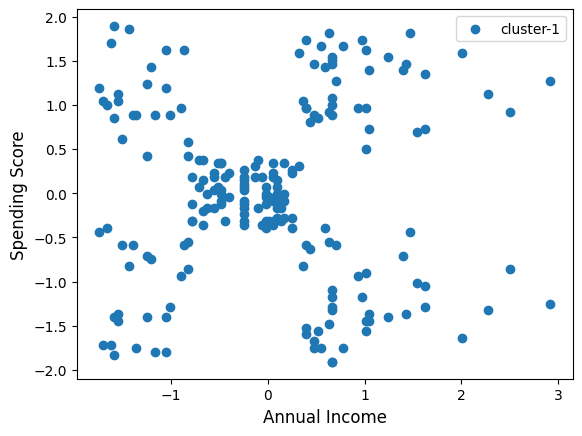

In [48]:
for i in np.unique(dbscan_labels):
    plt.scatter(data_scale.loc[data_scale["cluster"]==i, "Annual Income (k$)"],
               data_scale.loc[data_scale["cluster"]==i,"Spending Score (1-100)"],
                label = "cluster" + str(i))
    
plt.legend()
plt.xlabel("Annual Income", size=12)
plt.ylabel("Spending Score",size=12)
plt.show()

(6) cluster의 값이 -1인 경우가 존재하는 것을 확인할 수 있습니다. 해당 값은 무엇을 의미하는지 작성해주세요.

[답안]

: 

3.2

(1) 위에서 만든 df 데이터셋을 이용하겠습니다. BayesianGaussianMixture를 사용하여 베이지안 가우시안 모델을 이용한 군집화를 진행하기 위해 빈칸(<?>)을 채워주세요.(n_components=10, n_init=10)

In [ ]:
from sklearn.mixture import BayesianGaussianMixture

In [ ]:
bgm = < ? >
bgm.fit(< ? >)

(2) 몇 개의 컴포넌트가 필요한지 알아내는 코드를 작성해주세요.